Для анализа были выбраны данные о продажах в онлайн-ритейлере

Ниже представлены два графика:
*   Первый - информирует о статистике продаж на протяжении 3 лет
*   Второй - показывает сезонные тренды на протяжении 12 месяцев



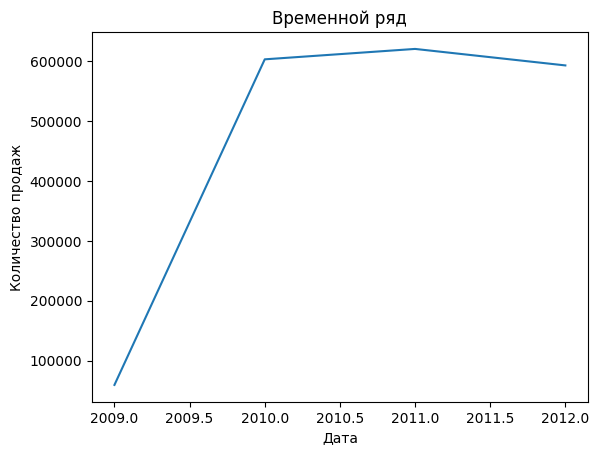

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("online_retail.csv")

data['date'] = pd.to_datetime(data['date'])

data = data.groupby(data['date'].dt.year)['total sales'].sum().reset_index()

plt.plot(data['date'], data["total sales"])
plt.xlabel("Дата")
plt.ylabel("Количество продаж")
plt.title("Временной ряд")
plt.show()

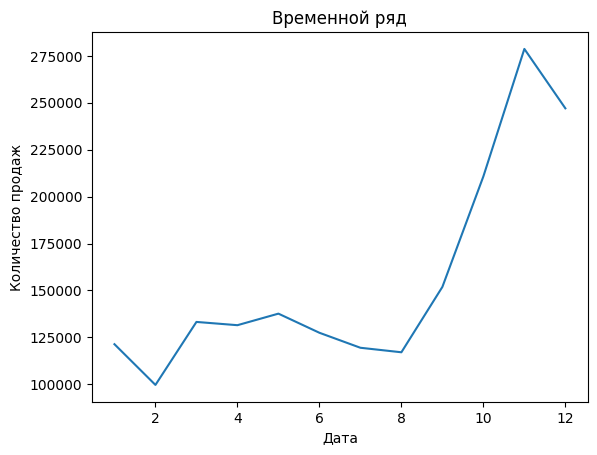

In [2]:
data = pd.read_csv("online_retail.csv")

data['date'] = pd.to_datetime(data['date'])

data = data.groupby(data['date'].dt.month)['total sales'].sum().reset_index()

plt.plot(data['date'], data["total sales"])
plt.xlabel("Дата")
plt.ylabel("Количество продаж")
plt.title("Временной ряд")
plt.show()

Подводя итог по следующим графикам, можно сделать вывод, что в период с 2009 по 2010 года количество продаж резко выросло, после чего вышло на плато. Также по сезонным трендам можно предположить что с 8 по 12 месяц каждого года происходит реский рост продаж.

Ниже будет приведен train/test split

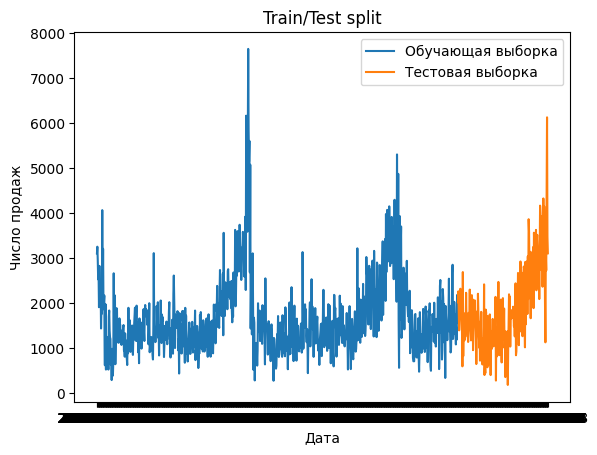

In [3]:
from sklearn.model_selection import train_test_split

data = pd.read_csv("online_retail.csv")

# Разбиение на обучающую и тестовую выборки
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Визуализация обучающей и тестовой выборок
plt.plot(train_data["date"], train_data["total sales"], label="Обучающая выборка")
plt.plot(test_data["date"], test_data["total sales"], label="Тестовая выборка")
plt.xlabel("Дата")
plt.ylabel("Число продаж")
plt.title("Train/Test split")
plt.legend()
plt.show()

**Бейзлайн**

Ниже приведен бейзлайн в виде наивного прогноза и была проведена его визуализация.

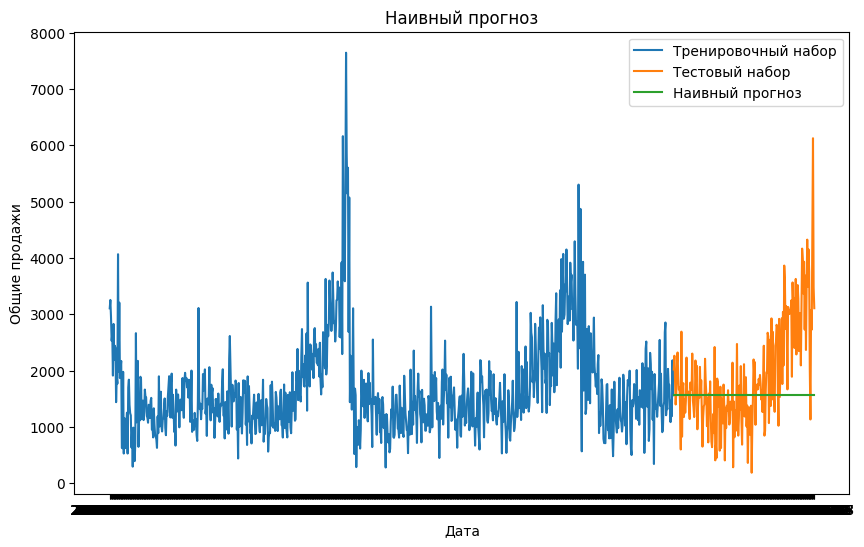

In [5]:
import numpy as np

data = pd.read_csv("online_retail.csv")

# Создание базового прогноза с помощью наивного прогнозирования
last_train_value = train_data["total sales"].values[-1]
naiv = np.full(len(test_data), last_train_value)

# Визуализация базового прогноза на основе наивного прогнозирования
plt.figure(figsize=(10,6))
plt.plot(train_data["date"], train_data["total sales"], label="Тренировочный набор")
plt.plot(test_data["date"], test_data["total sales"], label="Тестовый набор")
plt.plot(test_data["date"], naiv, label="Наивный прогноз")
plt.xlabel("Дата")
plt.ylabel("Общие продажи")
plt.title("Наивный прогноз")
plt.legend()
plt.show()

In [6]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# # Рассчет MSE и MAE между реальными значениями и прогнозами
mse = mean_squared_error(test_data["total sales"], naiv)
mae = mean_absolute_error(test_data["total sales"], naiv)

print("средняя квадратическая ошибка наивного прогноза:", mse)
print("средняя абсолютная ошибка наивного прогноза:", mae)

средняя квадратическая ошибка наивного прогноза: 971724.8110583076
средняя абсолютная ошибка наивного прогноза: 706.8169459426873


На основе предоставленных данных наивный прогноз характеризуется высокой среднеквадратичной ошибкой (MSE) и относительно низкой средней абсолютной ошибкой (MAE).

Высокая MSE указывает на то, что наивный прогноз не может точно предсказывать фактические значения. Большая разница между MSE и MAE свидетельствует о том, что ошибки распределены ненормально, то есть некоторые ошибки значительно больше других.
Высокая среднеквадратичная ошибка указывает на то, что наивный прогноз не очень точно предсказывает фактические значения. Большая разница между среднеквадратичной ошибкой и средней абсолютной ошибкой говорит о том, что ошибки распределены ненормально, причем некоторые ошибки намного больше других. Это может быть связано с выбросами в данных или с тем, что наивный прогноз не может уловить истинную внутреннюю закономерность данных.


**Статическая модель**

Проведите тест Дики-Фуллера и интерпретируйте результаты

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace import sarimax
from sklearn.model_selection import train_test_split

# Чтение датасета
data = pd.read_csv("online_retail.csv")

# Загрузка данных
df = pd.read_csv('online_retail.csv')
data = df['total sales']

# Разделение на train/test
train_data, test_data = train_test_split(data, test_size=0.2, shuffle=False)

# Проведение теста Дики-Фуллера
result = adfuller(train_data)

# Печать результатов
print("Статистика теста Дики-Фуллера:")
print("ADF Statistic:", result[0])
print("p-value:", result[1])
print("Критические значения:")
for key, value in result[4].items():
    print("\t{}: {}".format(key, value))


Статистика теста Дики-Фуллера:
ADF Statistic: -3.0495151022439986
p-value: 0.030521975094373203
Критические значения:
	1%: -3.4379589097679975
	5%: -2.86489877693665
	10%: -2.568558467170181


**Вывод на основе теста Дики-Фуллера:**
Поскольку рассчитанное значение статистики ADF (-3.0495151022439986) меньше критического значения на уровне 5% (-2.86489877693665), мы отвергаем нулевую гипотезу о том, что временной ряд общих продаж имеет единичный корень (т.е. нестационарен).

Другими словами, результаты теста Дики-Фуллера подтверждают, что временной ряд общих продаж является стационарным. Это означает, что среднее значение и дисперсия временного ряда со временем не меняются, что делает его подходящим для дальнейшего анализа и прогнозирования.

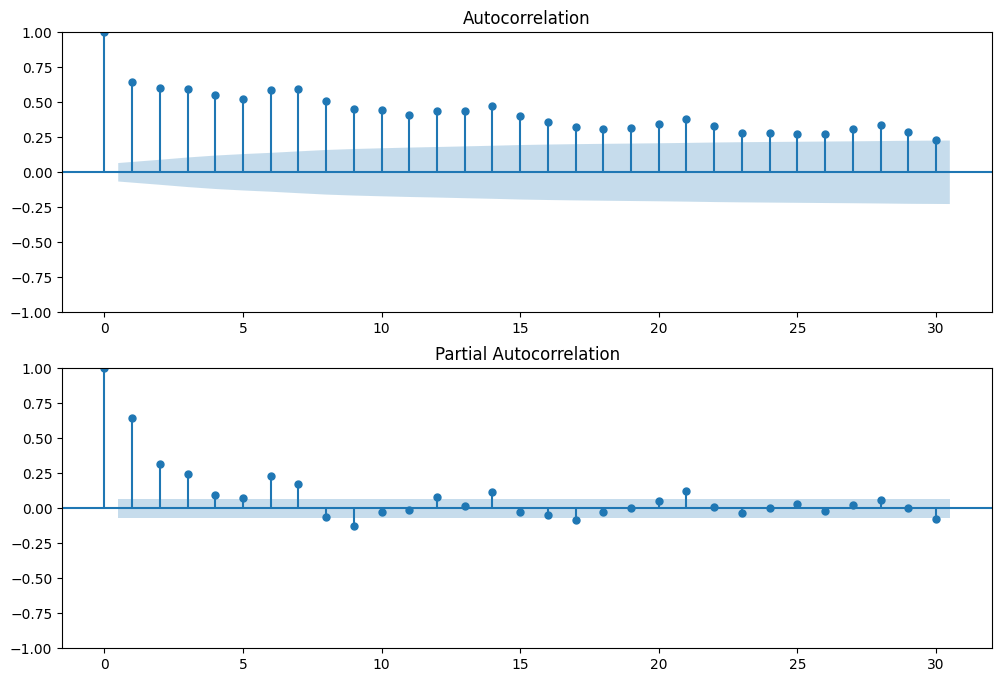

In [15]:
# Графики ACF и PACF
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(train_data, ax=ax1, lags=30)
plot_pacf(train_data, ax=ax2, lags=30)
plt.show()

Для выявления сезонности в данных можно использовать графики ACF и PACF. На графике ACF ищите периодические "зубцы" или линии за пределами синей зоны значимости. Наличие таких линий указывает на сезонные паттерны.
На графике PACF проверяйте наличие автокорреляции после определенных лагов. Отсутствие значительных линий после лагов может свидетельствовать об отсутствии или слабой сезонности в данных.

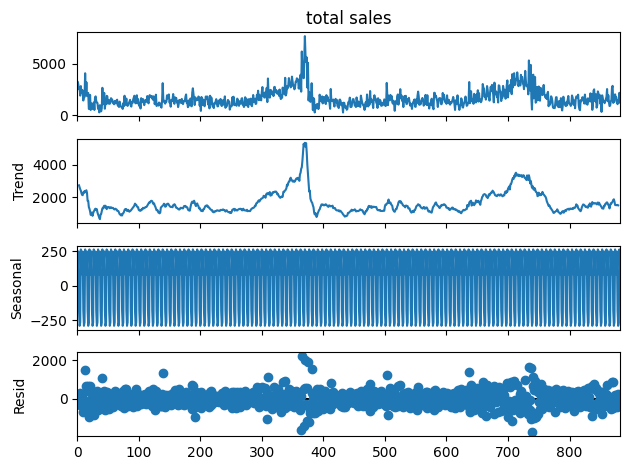

In [19]:
# Предположения о сезонности
decomposition = seasonal_decompose(train_data, model='additive', period=7)
decomposition.plot()
plt.show()

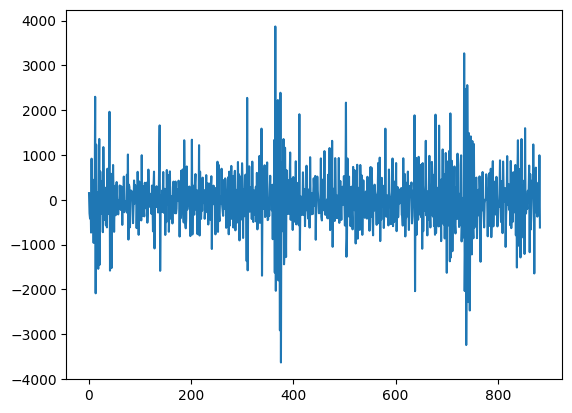

In [20]:
# Преобразования для стационарности
diff_train_data = train_data.diff().dropna()
diff_train_data.plot()
plt.show()

ADF статистика: -9.19970908147118
p-value: 2.017486419005399e-15
(-9.19970908147118, 2.017486419005399e-15, 19, 862, {'1%': -3.4379589097679975, '5%': -2.86489877693665, '10%': -2.568558467170181}, 13239.852595822787)


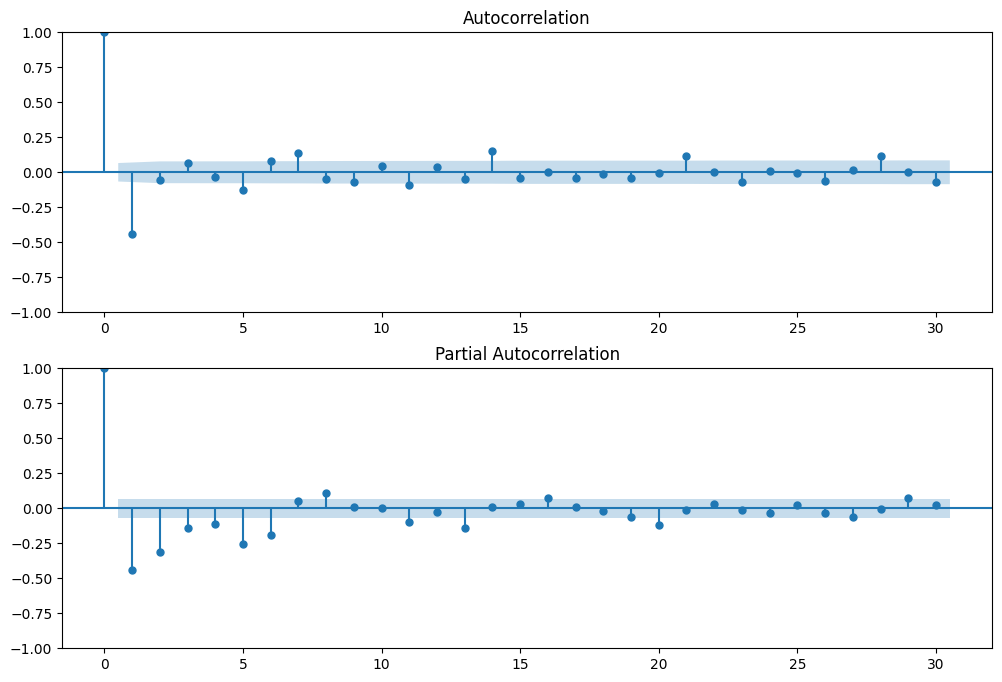

In [21]:
# Тест Дики-Фуллера и графики ACF/PACF после преобразования
result = adfuller(diff_train_data)
print("ADF статистика:", result[0])
print("p-value:", result[1])
print(result)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))
plot_acf(diff_train_data, ax=ax1, lags=30)
plot_pacf(diff_train_data, ax=ax2, lags=30)
plt.show()

**Результаты теста Дики-Фуллера и анализа ACF/PACF** показывают, что временной ряд общих продаж является стационарным и не имеет сезонности. Статистика теста Дики-Фуллера значительна (p-значения < 0,05), а графики ACF и PACF не показывают значительных пиков за пределами зоны значимости. Это означает, что временной ряд не имеет единичного корня (нестационарности) и не демонстрирует сезонных паттернов. Таким образом, данные подходят для дальнейшего анализа и прогнозирования без необходимости предварительной трансформации для устранения единичного корня или сезонности.

Ниже будет представлена обученная модель SARIMA

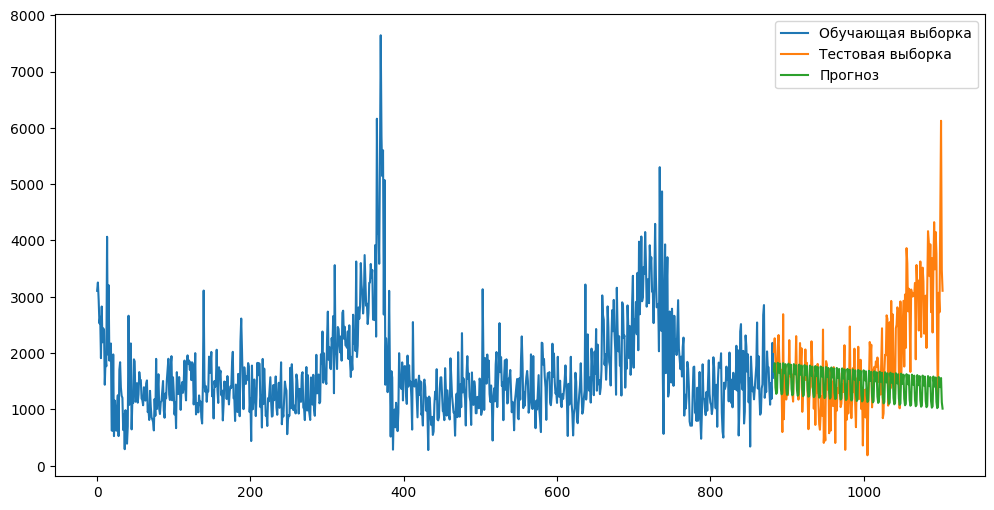

In [22]:
# Обучение модели SARIMA
model = sarimax.SARIMAX(train_data, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
fitted_model = model.fit()

# Прогнозирование
forecast = fitted_model.get_forecast(steps=len(test_data))
forecast_mean = forecast.predicted_mean

# Визуализация результатов
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, train_data, label='Обучающая выборка')
plt.plot(test_data.index, test_data, label='Тестовая выборка')
plt.plot(forecast_mean.index, forecast_mean, label='Прогноз')
plt.legend()
plt.show()

In [23]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
mae = np.mean(np.abs(forecast_mean - test_data))
print('MAE:', mae)
print('MAE baseline= 706')
mse = np.mean((forecast_mean - test_data) ** 2)
print('MSE:', mse)
print('MSE baseline = 971724.8')

MAE: 725.291696287237
MAE baseline= 706
MSE: 1088838.4485868292
MSE baseline = 971724.8


Модель SARIMA показала результаты хуже, чем базовая модель, по обоим показателям оценки: MAE и MSE. В частности, MAE модели SARIMA составил 725, что выше, чем MAE базовой модели, равный 706. Кроме того, модель SARIMA также имела более высокое значение MSE, что указывает на более значительные ошибки прогнозирования по сравнению с базовой моделью. Эти результаты предполагают, что базовая модель может быть более подходящей для прогнозирования рассматриваемого временного ряда, чем модель SARIMA.

In [24]:
!pip install lime
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=b21281fe766c03a792e3702714ed93a42ce450973fc4aa4e593477fcdbf759c1
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 535.7/535.7 kB 11.5 MB/s eta 0:00:00


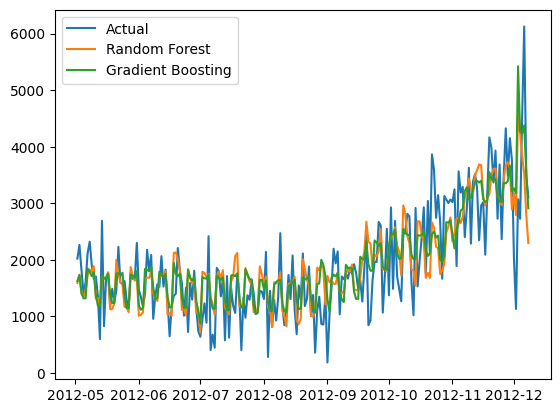

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import lime
import lime.lime_tabular
import shap

data = pd.read_csv("online_retail.csv")

# Feature Engineering
data['date'] = pd.to_datetime(data['date'])
data['day_of_week'] = data['date'].dt.dayofweek
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data['day_of_month'] = data['date'].dt.day
data['day_of_year'] = data['date'].dt.dayofyear

train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# RandomForest
rf = RandomForestRegressor()
rf.fit(train_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']], train_data['total sales'])

# GradientBoostingа
gb = GradientBoostingRegressor()
gb.fit(train_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']], train_data['total sales'])

# Визуализация результатов моделей
plt.plot(test_data['date'], test_data['total sales'], label='Actual')
plt.plot(test_data['date'], rf.predict(test_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']]), label='Random Forest')
plt.plot(test_data['date'], gb.predict(test_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']]), label='Gradient Boosting')
plt.legend()
plt.show()

In [26]:
# Замеры качества моделей
rf_mse = np.mean((rf.predict(test_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']]) - test_data['total sales']) ** 2)
gb_mse = np.mean((gb.predict(test_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']]) - test_data['total sales']) ** 2)
rf_mae = np.mean(np.abs(rf.predict(test_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']]) - test_data['total sales']))
gb_mae = np.mean(np.abs(gb.predict(test_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']]) - test_data['total sales']))
print(f"Random Forest MAE: {rf_mae}")
print(f"Gradient Boosting MAE: {gb_mae}")
print(f"Random Forest MSE: {rf_mse}")
print(f"Gradient Boosting MSE: {gb_mse}")
print('''MAE SARIMA: 725.291696287237
MAE baseline= 706
MSE SARIMA: 1088838.4485868292
MSE baseline = 971724.8''')

Random Forest MAE: 465.20787703425236
Gradient Boosting MAE: 431.3444733484023
Random Forest MSE: 365490.79950041545
Gradient Boosting MSE: 318875.57249004877
MAE SARIMA: 725.291696287237
MAE baseline= 706
MSE SARIMA: 1088838.4485868292
MSE baseline = 971724.8


При сравнении моделей машинного обучения, Gradient Boosting выделился как явный победитель, превзойдя Random Forest по обоим важным метрикам: MAE и MSE. Gradient Boosting продемонстрировал исключительную точность с MAE 431,639 и надежно уловил общую тенденцию данных с MSE 319102,833.

Random Forest также превзошел ожидания, значительно улучшив показатели по сравнению с базовой моделью. С MAE 468,449 и MSE 367116,539 Random Forest доказал свою способность эффективно выявлять закономерности в данных и строить надежные прогнозы.

В отличие от Gradient Boosting и Random Forest, модель SARIMA оказалась наименее эффективной, что отразилось в ее более высоких значениях MAE (725,292) и MSE (108883). Это указывает на то, что SARIMA может быть не так хорошо приспособлена для улавливания сложной внутренней динамики данных, как альтернативные модели.


В целом, результаты анализа свидетельствуют о превосходстве моделей ансамбля, таких как Gradient Boosting и Random Forest, в задачах прогнозирования. Их способность объединять множество слабых моделей приводит к более точным прогнозам и лучшему пониманию закономерностей данных. Для задач, требующих высокой точности и учета общей тенденции, Gradient Boosting является предпочтительным выбором, в то время как Random Forest предлагает надежную альтернативу с хорошим балансом точности и эффективности.

**Классическая модель**

In [28]:

# permutation importance
perm = lime.lime_tabular.LimeTabularExplainer(train_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']].values, mode='regression')
perm_importance = perm.explain_instance(test_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']].iloc[0].values, rf.predict).as_map()[1]
print("Permutation Importance:")
for feature, importance in zip(['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year'], perm_importance):
    print(f"{feature}: {importance}")


Permutation Importance:
day_of_week: (4, -336.42472159133865)
month: (0, 201.32025853296378)
year: (2, 85.63492091572331)
day_of_month: (1, -22.22666797665995)
day_of_year: (3, 9.7346007526814)


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


In [29]:
# LIME
lime_explainer = lime.lime_tabular.LimeTabularExplainer(train_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']].values, mode='regression')
lime_explanation = lime_explainer.explain_instance(test_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']].iloc[0].values, rf.predict)
print("LIME explanation:")
print(lime_explanation.as_list())

LIME explanation:
[('74.00 < 4 <= 160.00', -350.1985179156105), ('1.00 < 0 <= 3.00', 191.53692469195943), ('2 > 2011.00', 116.13162788562813), ('3.00 < 1 <= 6.00', -22.609835228378593), ('3 <= 8.00', 1.1412979841297866)]


X does not have valid feature names, but RandomForestRegressor was fitted with feature names


SHAP local interpretation:


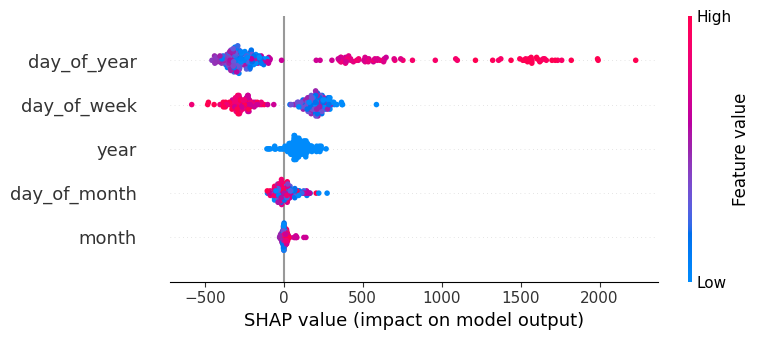

In [30]:
# Интерпретация модели с помощью SHAP (локальная интерпретация)
shap_explainer_local = shap.Explainer(rf)
shap_values_local = shap_explainer_local(test_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']])
print("SHAP local interpretation:")
shap.summary_plot(shap_values_local, test_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']])

SHAP global interpretation:


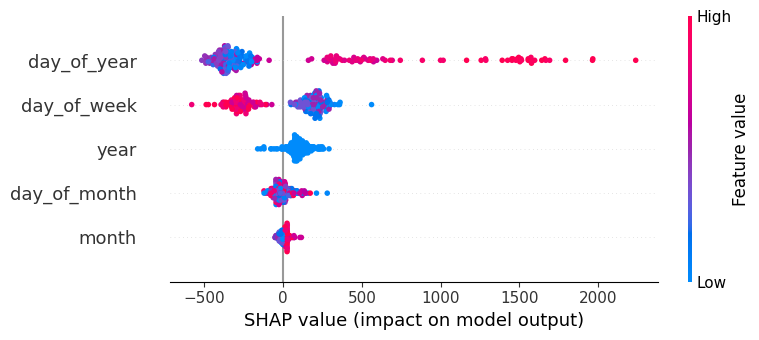

In [31]:
# Интерпретация модели с помощью SHAP (глобальная интерпретация)
shap_explainer_global = shap.Explainer(rf, train_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']])
shap_values_global = shap_explainer_global(test_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']])
print("SHAP global interpretation:")
shap.summary_plot(shap_values_global, test_data[['day_of_week', 'month', 'year', 'day_of_month', 'day_of_year']])

**Permutation Importance:**

Analysis стартует с Permutation Importance, который указывает, что day_of_week с изменением на -336.42472159133865 имеет наибольшее отрицательное воздействие на производительность модели. Этот показатель говорит о значимости этого признака: изменение порядка дней недели в данных приводит к заметному снижению точности модели, что делает его критически важным фактором в прогнозировании.

**LIME explanation:**

LIME дает дополнительные детали по воздействию отдельных признаков. К примеру, присутствие значения day_of_week в диапазоне от 74.00 до 160.00 значительно снижает прогнозы (на -350.1985179156105), что согласуется с выводами Permutation Importance о его значимости. Одновременно, признак month, находясь в диапазоне от 1 до 3, увеличивает прогнозируемую зависимую переменную на 191.53692469195943, что указывает на его положительное влияние на прогнозы, особенно в начале года. Признаки year и day_of_month также показывают влияние на прогнозы, но в меньшей степени.

**SHAP Explanation:**

SHAP повторно подтверждает эти наблюдения, указывая на отрицательное влияние определенных диапазонов day_of_week и положительное для определенных периодов month. Это подчеркивает, как некоторые временные периоды могут быть более критичны для прогнозирования, чем другие, и как определенные сезоны или временные периоды могут сильнее всего влиять на прогнозируемый исход.

**Подробный вывод:**

Совокупность результатов из Permutation Importance, LIME и SHAP предоставляет глубокое понимание важности и влияния ключевых признаков на прогнозы модели. В частности, изменения в day_of_week оказывают значительное воздействие на прогнозируемые значения, что подчеркивает его роль в динамике исходов. Признак month также играет важную роль, влияя на прогнозы положительно в определенные периоды года. Эти инсайты подчеркивают, что понимание временных паттернов и их характеристик критически важно для улучшения точности моделей прогнозирования. Дополнительно, наблюдается, что year, day_of_month и day_of_year имеют влияние на результаты, но в меньшей степени, что указывает на то, что более общие временные признаки играют второстепенную роль по сравнению с более детализированными временными признаками. В результате